# Problem Statement



<html> <font color = Darkblue>
The purpose is to predict whether the Pima Indian women shows signs of diabetes or not. We are using a dataset collected by "National Institute of Diabetes and Digestive and Kidney Diseases" which consists of a number of attributes which would help us to perform this prediction.
</font>
</html>

<html>
<font color = blue>
<b>Constraints on data collection </b>

</font>
</html>

<html> <font color = Darkblue>
All patients whose data has been collected are females at least 21 years old of Pima Indian heritage
</font>
</html>

In [1]:
#Import all the necessary modules

import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split


# Q1. Load the PIMA Indian Diabetes file into Python DataFrame. 


The file can be accessed directly from the URL (https://archive.ics.uci.edu/ml/machine-learning-databases/pima-indians-diabetes/pima-indians-diabetes.data or you may first download it to a local folder and then load it into Python dataframe.  Let us assume the data frame is named pima_df


In [141]:
import pandas as pd
pima_diabetes = pd.read_csv("pima-indians-diabetes.data")

print(pima_diabetes)

column = ['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMIBody','Diabetes','Age','Outcome']

pima_diabetes.columns=column


pima_diabetes




      6  148  72  35    0  33.6  0.627  50  1
0     1   85  66  29    0  26.6  0.351  31  0
1     8  183  64   0    0  23.3  0.672  32  1
2     1   89  66  23   94  28.1  0.167  21  0
3     0  137  40  35  168  43.1  2.288  33  1
4     5  116  74   0    0  25.6  0.201  30  0
5     3   78  50  32   88  31.0  0.248  26  1
6    10  115   0   0    0  35.3  0.134  29  0
7     2  197  70  45  543  30.5  0.158  53  1
8     8  125  96   0    0   0.0  0.232  54  1
9     4  110  92   0    0  37.6  0.191  30  0
10   10  168  74   0    0  38.0  0.537  34  1
11   10  139  80   0    0  27.1  1.441  57  0
12    1  189  60  23  846  30.1  0.398  59  1
13    5  166  72  19  175  25.8  0.587  51  1
14    7  100   0   0    0  30.0  0.484  32  1
15    0  118  84  47  230  45.8  0.551  31  1
16    7  107  74   0    0  29.6  0.254  31  1
17    1  103  30  38   83  43.3  0.183  33  0
18    1  115  70  30   96  34.6  0.529  32  1
19    3  126  88  41  235  39.3  0.704  27  0
20    8   99  84   0    0  35.4  0

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMIBody,Diabetes,Age,Outcome
0,1,85,66,29,0,26.6,0.351,31,0
1,8,183,64,0,0,23.3,0.672,32,1
2,1,89,66,23,94,28.1,0.167,21,0
3,0,137,40,35,168,43.1,2.288,33,1
4,5,116,74,0,0,25.6,0.201,30,0
5,3,78,50,32,88,31.0,0.248,26,1
6,10,115,0,0,0,35.3,0.134,29,0
7,2,197,70,45,543,30.5,0.158,53,1
8,8,125,96,0,0,0.0,0.232,54,1
9,4,110,92,0,0,37.6,0.191,30,0


It is always a good practice to eye-ball raw data to get a feel of the data in terms of number of structure of the file, number of attributes, types of attributes and a general idea of likely challenges in the dataset. You would notice that it is a comma separated file. There are no column names!. Check the associated folders and find out about each attribute the name. What information is available about the data.

# Q2. Print 10 samples from the dataset

In [56]:
pima_diabetes.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMIBody,Diabetes,Age,Outcome
0,1,85,66,29,0,26.6,0.351,31,0
1,8,183,64,0,0,23.3,0.672,32,1
2,1,89,66,23,94,28.1,0.167,21,0
3,0,137,40,35,168,43.1,2.288,33,1
4,5,116,74,0,0,25.6,0.201,30,0
5,3,78,50,32,88,31.0,0.248,26,1
6,10,115,0,0,0,35.3,0.134,29,0
7,2,197,70,45,543,30.5,0.158,53,1
8,8,125,96,0,0,0.0,0.232,54,1
9,4,110,92,0,0,37.6,0.191,30,0


# Q3 Print the datatypes of each column and the shape of the dataset 

In [60]:
print(pima_diabetes.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 767 entries, 0 to 766
Data columns (total 9 columns):
Pregnancies      767 non-null int64
Glucose          767 non-null int64
BloodPressure    767 non-null int64
SkinThickness    767 non-null int64
Insulin          767 non-null int64
BMIBody          767 non-null float64
Diabetes         767 non-null float64
Age              767 non-null int64
Outcome          767 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.0 KB
None


There are '0's in the data. Are they really valid '0's or they are missing values?
Plasma, BP, skin thickness etc. these values cannot be 0.
look at column by column logically to understand this.


In [ ]:
pima_diabetes

# Q4 Replace all the 0s in the column with the median of the same column value accordingly.

In [147]:


#median_pregnancies = pima_diabetes['Pregnancies'].median()

# As the pregnanices may or may be 0 not replacing this 
# print('median_pregnancies', median_pregnancies)

# # column_name ='Pregnancies'

# mask = pima_diabetes.Pregnancies == 0
# pima_diabetes.loc[mask,'Pregnancies'] = median_pregnancies
#pima_diabetes




# for i in column:
#     if (i != 'Pregnancies') and (i != 'Outcome'):
#         median_value = pima_diabetes[i].median()
#         mask = pima_diabetes[i] == 0
#         pima_diabetes.loc[mask,column]
# pima_diabetes



pima_diabetes["Glucose"] = pima_diabetes["Glucose"].replace(0,pima_diabetes["Glucose"].median())
pima_diabetes["BloodPressure"]= pima_diabetes["BloodPressure"].replace(0,pima_diabetes["Glucose"].median())      
pima_diabetes["SkinThickness"] = pima_diabetes["SkinThickness"].replace(0,pima_diabetes["SkinThickness"].median())
pima_diabetes["Insulin"] = pima_diabetes["Insulin"].replace(0,pima_diabetes["Insulin"].median())

    
pima_diabetes

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMIBody,Diabetes,Age,Outcome
0,1,85,66,29,32,26.6,0.351,31,0
1,8,183,64,23,32,23.3,0.672,32,1
2,1,89,66,23,94,28.1,0.167,21,0
3,0,137,40,35,168,43.1,2.288,33,1
4,5,116,74,23,32,25.6,0.201,30,0
5,3,78,50,32,88,31.0,0.248,26,1
6,10,115,117,23,32,35.3,0.134,29,0
7,2,197,70,45,543,30.5,0.158,53,1
8,8,125,96,23,32,0.0,0.232,54,1
9,4,110,92,23,32,37.6,0.191,30,0


# Q5 Print the descriptive statistics of each & every column using describe() function

In [148]:
pima_diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMIBody,Diabetes,Age,Outcome
count,767.000000,767.000000,767.000000,767.000000,767.00000,767.000000,767.000000,767.000000,767.000000
mean,3.842243,121.621904,74.440678,27.324641,95.46545,31.990482,0.471674,33.219035,0.348110
std,3.370877,30.443252,15.271907,9.230877,105.14839,7.889091,0.331497,11.752296,0.476682
min,0.000000,44.000000,24.000000,7.000000,14.00000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.500000,64.000000,23.000000,32.00000,27.300000,0.243500,24.000000,0.000000
50%,3.000000,117.000000,74.000000,23.000000,32.00000,32.000000,0.371000,29.000000,0.000000
75%,6.000000,140.000000,82.000000,32.000000,127.50000,36.600000,0.625000,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.00000,67.100000,2.420000,81.000000,1.000000


# Q6 See the distribution of 'Class' variable and plot it using appropriate graph.

In [149]:
X = pima_diabetes.drop(labels= "Outcome" , axis = 1)
y = pima_diabetes[["Outcome"]]

#Just for your understanding - Using univariate analysis check the individual attributes for their basic statistic such as central values, spread, tails etc. What are your observations (any two attributes). Its an optional step and will not be graded.

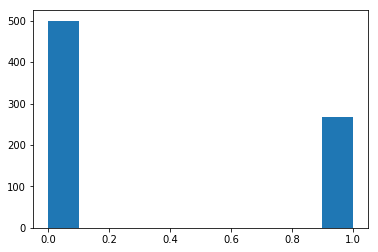

In [150]:
import numpy as np; np.random.seed(13)
import matplotlib.pyplot as plt


    
plt.show()


# Histogram
plt.hist(pima_diabetes['Outcome'])
plt.show()



# Q7. Use pairplots and correlation method to observe the relationship between different variables and state your insights.
Hint: Use seaborn plot and check the relationship between different variables 


               count        mean         std     min      25%      50%  \
Pregnancies    767.0    3.842243    3.370877   0.000   1.0000    3.000   
Glucose        767.0  121.621904   30.443252  44.000  99.5000  117.000   
BloodPressure  767.0   74.440678   15.271907  24.000  64.0000   74.000   
SkinThickness  767.0   27.324641    9.230877   7.000  23.0000   23.000   
Insulin        767.0   95.465450  105.148390  14.000  32.0000   32.000   
BMIBody        767.0   31.990482    7.889091   0.000  27.3000   32.000   
Diabetes       767.0    0.471674    0.331497   0.078   0.2435    0.371   
Age            767.0   33.219035   11.752296  21.000  24.0000   29.000   
Outcome        767.0    0.348110    0.476682   0.000   0.0000    0.000   

                   75%     max  
Pregnancies      6.000   17.00  
Glucose        140.000  199.00  
BloodPressure   82.000  122.00  
SkinThickness   32.000   99.00  
Insulin        127.500  846.00  
BMIBody         36.600   67.10  
Diabetes         0.625    2.

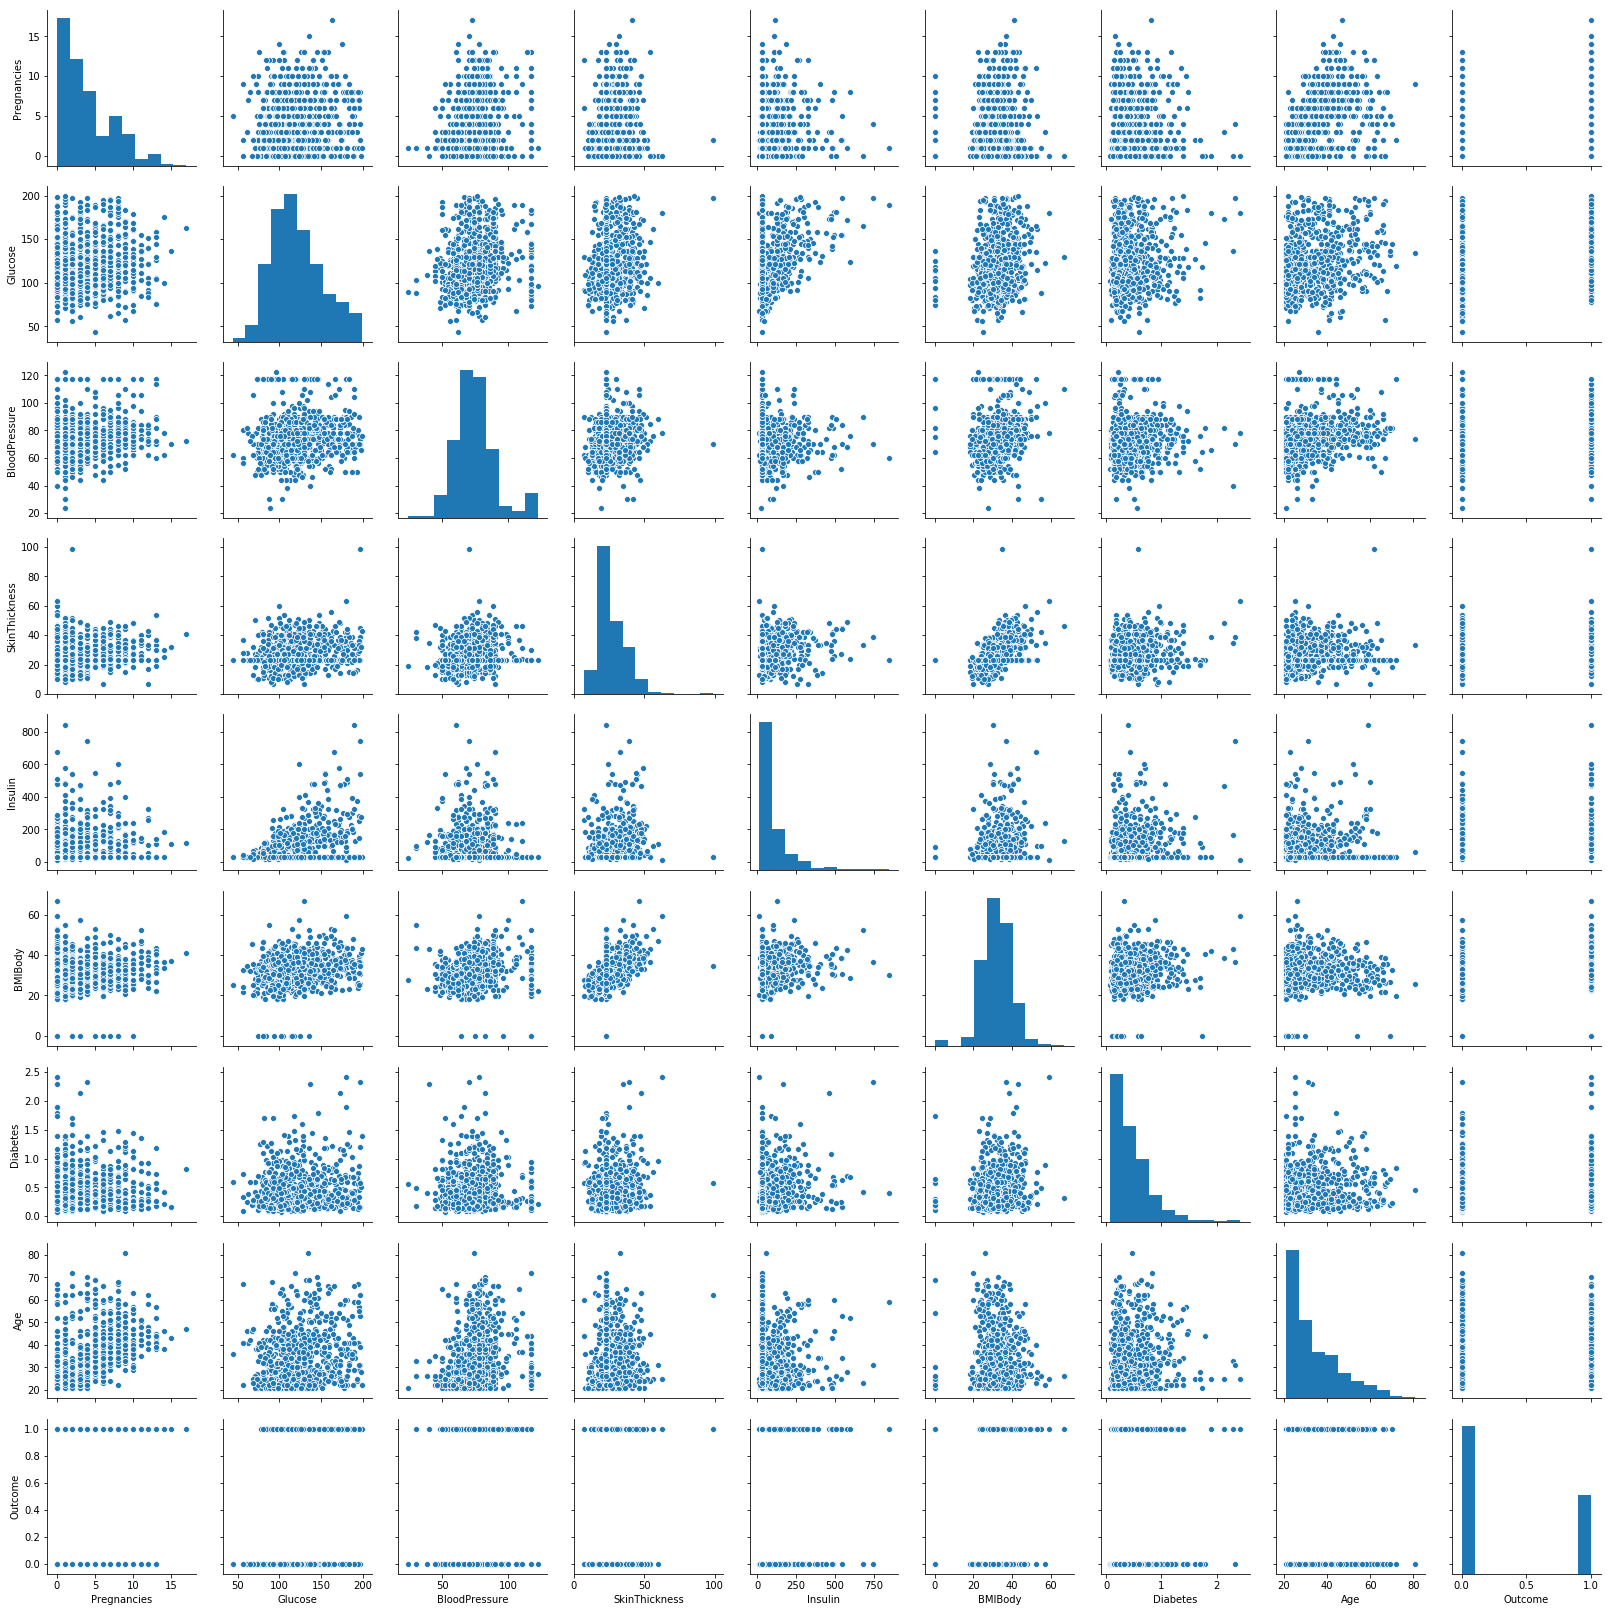

In [151]:
print(pima_diabetes.describe().T)


# importing ploting libraries
import matplotlib.pyplot as plt   
#importing seaborn for statistical plots
import seaborn as sns
# To enable plotting graphs in Jupyter notebook
%matplotlib inline 

sns.pairplot(pima_diabetes)

In [ ]:


               count        mean         std     min      25%      50%  \  
Pregnancies    767.0    3.842243    3.370877   0.000   1.0000    3.000   
Glucose        767.0  121.621904   30.443252  44.000  99.5000  117.000   
BloodPressure  767.0   74.440678   15.271907  24.000  64.0000   74.000   
SkinThickness  767.0   27.324641    9.230877   7.000  23.0000   23.000   
Insulin        767.0   95.465450  105.148390  14.000  32.0000   32.000   
BMIBody        767.0   31.990482    7.889091   0.000  27.3000   32.000   
Diabetes       767.0    0.471674    0.331497   0.078   0.2435    0.371   
Age            767.0   33.219035   11.752296  21.000  24.0000   29.000   
Outcome        767.0    0.348110    0.476682   0.000   0.0000    0.000   

                   75%     max  
Pregnancies      6.000   17.00  
Glucose        140.000  199.00  
BloodPressure   82.000  122.00  
SkinThickness   32.000   99.00  
Insulin        127.500  846.00  
BMIBody         36.600   67.10  
Diabetes         0.625    2.42  
Age             41.000   81.00  
Outcome          1.000    1.00



from the graph we can see that 75 %  of the population is diabitic.
25 % of the population is not diabitic .


diabetes vs preganncy does not have any effect .


the age distribution is rightly skewed .



















Using the plot - infer the relationship between different variables

# Q8 Split the pima_df into training and test set in the ratio of 70:30 (Training:Test).</b>


In [76]:

from sklearn.model_selection import train_test_split
test_size = 0.30 # taking 70:30 training and test set
seed = 7  # Random numbmer seeding for reapeatability of the code
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMIBody,Diabetes,Age
616,2,68,62,13,15,20.1,0.257,23
578,2,197,70,99,0,34.7,0.575,62
492,4,125,70,18,122,28.9,1.144,45
205,8,196,76,29,280,37.5,0.605,57
708,2,93,64,32,160,38.0,0.674,23
3,0,137,40,35,168,43.1,2.288,33
58,0,105,64,41,142,41.5,0.173,22
223,1,100,66,15,56,23.6,0.666,26
101,0,125,96,0,0,22.5,0.262,21
745,1,147,94,41,0,49.3,0.358,27


# Q9 Create the decision tree model using “entropy” method of reducing the entropy and fit it to training data.</b>



In [95]:
from sklearn.model_selection import GridSearchCV
# cv = kfold
parameter={'max_depth':np.arange(1,10)}
GS=GridSearchCV(pima_diabetes,parameter,cv=3)
GS.fit(X,y)

GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_depth': array([1, 2, 3, 4, 5, 6, 7, 8, 9])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [96]:
GS.best_params_

{'max_depth': 4}

In [97]:
%matplotlib inline
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn import model_selection
from sklearn import metrics
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
pima_diabetes_model = DecisionTreeClassifier(criterion = 'entropy' ,random_state=0,  max_depth=4)
pima_diabetes_model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [98]:
y_pred=pima_diabetes_model.predict(X_test)   # performance on test data

acc=metrics.accuracy_score(y_test,y_pred)

print(acc)

0.7402597402597403


# Q10 Print the accuracy of the model & print the confusion matrix 

In [99]:
y_pred=pima_diabetes_model.predict(X_test)   # performance on test data

acc=metrics.accuracy_score(y_test,y_pred)

print(acc)

0.7402597402597403


Print the feature importance of the decision model - Optional

# Q12 Apply the Random forest model and print the accuracy of Random forest Model

In [122]:
# Random FOrest
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
base_rf=RandomForestClassifier(n_estimators=101,random_state=2)

base_rf.fit(X_train,y_train)
base_rf.predict(X_test)

y_pred=base_rf.predict(X_test)
acc=metrics.accuracy_score(y_test,y_pred)
print(acc)




0.7662337662337663


C:\Users\anusingh\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


# Q13 Apply Adaboost Ensemble Algorithm for the same data and print the accuracy.

In [132]:
from sklearn.ensemble import AdaBoostClassifier
 
base_rf=AdaBoostClassifier(n_estimators=50,random_state=0)

base_rf.fit(X_train,y_train)

y_pred=base_rf.predict(X_test)

acc=metrics.accuracy_score(y_test,y_pred)
print(acc)



0.7532467532467533


C:\Users\anusingh\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


# Q14 - Apply Bagging Classifier Algorithm and print the accuracy.

In [136]:
from sklearn.ensemble import BaggingClassifier
bag_dt=BaggingClassifier(n_estimators=50,random_state=2)

bag_dt.fit(X_train,y_train)

y_pred = bag_dt.predict(X_test)

acc=metrics.accuracy_score(y_test,y_pred)
print(acc)

0.7532467532467533


C:\Users\anusingh\Anaconda3\lib\site-packages\sklearn\ensemble\bagging.py:621: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


# Q15 - Apply GradientBoost Classifier Algorithm for the same data and print the accuracy

In [139]:
from sklearn.ensemble import GradientBoostingClassifier

gradient_boost=GradientBoostingClassifier(n_estimators=25,random_state=2)

gradient_boost.fit(X_train,y_train)

y_pred = gradient_boost.predict(X_test)

acc=metrics.accuracy_score(y_test,y_pred)
print(acc)

0.7532467532467533


C:\Users\anusingh\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


# Next steps are optional and will not be graded.

Voting is one of the simplest ways of combining the predictions from multiple machine learning algorithms.

It works by first creating two or more standalone models from your training dataset. A Voting Classifier can then be used to wrap your models and average the predictions of the sub-models when asked to make predictions for new data.

Apply Voting Classfier on the given dataset and state your insights.